In [1]:
import pandas as pd
data=pd.read_csv('../데이터/breast-cancer-wisconsin.csv', encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression

In [3]:
X=data[data.columns[1:10]]
y=data[['Class']]
print(X.shape)
print(y.shape)

(683, 9)
(683, 1)


In [4]:
# 이미지 나누기
# stratify =y : y의 라벨의 개수에 맞게 저장해라
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=52)

In [5]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

scaler_minmax.fit(X_train)
scaler_standard.fit(X_train)

X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

X_scaled_minmax_test = scaler_minmax.transform(X_test)
X_scaled_standard_test = scaler_standard.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train,y_train)

c:\Users\hkyoo52\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [7]:
print(model.score(X_scaled_minmax_train,y_train))
print(model.score(X_scaled_minmax_test,y_test))

0.970703125
0.9707602339181286


In [8]:
# 혼동행렬 (TP,FP,FN,TN)
from sklearn.metrics import confusion_matrix

pred_train=model.predict(X_scaled_minmax_train)
confusion_matrix(y_train,pred_train)

array([[326,   7],
       [  8, 171]], dtype=int64)

In [9]:
pred_test=model.predict(X_scaled_minmax_test)
confusion_matrix(y_test,pred_test)

array([[108,   3],
       [  2,  58]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

pred_train = model.predict(X_scaled_minmax_train)
classification_report(y_train,pred_train)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       333\n           1       0.96      0.96      0.96       179\n\n    accuracy                           0.97       512\n   macro avg       0.97      0.97      0.97       512\nweighted avg       0.97      0.97      0.97       512\n'

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive, true_positive, threshold = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test,model.decision_function(X_scaled_minmax_test))
roc_auc

0.9974474474474474

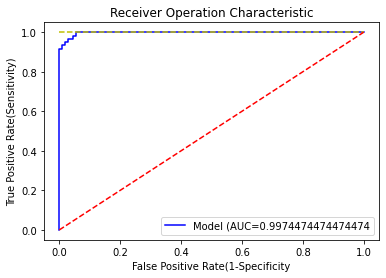

In [27]:
import matplotlib.pyplot as plt
plt.title('Receiver Operation Characteristic')
plt.xlabel('False Positive Rate(1-Specificity')
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive,true_positive,'b',label='Model (AUC={}'.format(roc_auc))
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')   # 범례 위치
plt.show()


In [41]:
y_train['y_pred']=pred_train
y_train[['y_prob0','y_prob1']]=model.predict_proba(X_scaled_minmax_train)
y_train

,Class,y_pred,y_prob0,y_prob1
286,0,0,0.906369,0.093631
308,0,0,0.977129,0.022871
614,0,0,0.942738,0.057262
248,0,0,0.985364,0.014636
350,0,0,0.982581,0.017419
...,...,...,...,...
305,0,0,0.980627,0.019373
634,0,0,0.957833,0.042167
47,1,1,0.039368,0.960632
372,1,1,0.057543,0.942457


In [42]:
y_test['y_pred']=pred_test
y_test[['y_prob0','y_prob1']]=model.predict_proba(X_scaled_minmax_test)
y_test

,Class,y_pred,y_prob0,y_prob1
8,0,0,0.982955,0.017045
284,1,1,0.014409,0.985591
454,0,0,0.987035,0.012965
511,0,0,0.980767,0.019233
656,0,0,0.982581,0.017419
...,...,...,...,...
588,1,1,0.077515,0.922485
417,0,0,0.963303,0.036697
98,1,1,0.050702,0.949298
521,0,0,0.960798,0.039202


In [43]:
Total_test=pd.concat([X_test,y_test],axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
8,2,1,1,1,2,1,1,1,5,0,0,0.982955,0.017045
284,5,5,7,8,6,10,7,4,1,1,1,0.014409,0.985591
454,1,1,2,1,2,1,2,1,1,0,0,0.987035,0.012965
511,4,1,1,1,2,1,1,1,1,0,0,0.980767,0.019233
656,2,1,1,1,2,1,3,1,1,0,0,0.982581,0.017419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,5,4,6,8,4,1,8,10,1,1,1,0.077515,0.922485
417,5,1,1,1,2,1,2,2,1,0,0,0.963303,0.036697
98,10,3,5,1,10,5,3,10,2,1,1,0.050702,0.949298
521,5,1,1,1,2,1,3,1,1,0,0,0.960798,0.039202
